## Bibliotecas

In [102]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## Leitura dos dados

Será usada a base <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance" target="_blank" rel="noopener noreferrer">Medical Cost Personal Datasets



**Sobre o Dataset**

Este conjunto de dados foi utilizado no livro *Machine Learning with R*, de Brett Lantz, que introduz conceitos de aprendizado de máquina usando a linguagem R. Embora o livro contenha os dados originais, eles não são facilmente acessíveis online sem comprar o livro e criar uma conta, o que pode ser um empecilho para quem deseja apenas estudar os dados. Por isso, esta versão do dataset foi disponibilizada publicamente, já limpa e formatada para facilitar o uso.

O dataset traz informações pessoais e médicas de beneficiários de seguro saúde nos EUA, com as seguintes colunas:

* **age**: idade do beneficiário principal
* **sex**: gênero do contratante do seguro (feminino ou masculino)
* **bmi**: índice de massa corporal, indicador objetivo da relação peso/altura, onde valores entre 18.5 e 24.9 são considerados ideais
* **children**: número de filhos ou dependentes cobertos pelo seguro
* **smoker**: indica se o beneficiário é fumante ou não
* **region**: região residencial do beneficiário nos EUA (nordeste, sudeste, sudoeste, noroeste)
* **charges**: custo individual médico faturado pelo seguro saúde

Esse conjunto de dados é muito utilizado para exercícios e exemplos em aprendizado de máquina, especialmente para modelos de regressão e análise preditiva dico ou mais informal?


In [67]:
dados_insurance = pd.read_csv("../data/raw/insurance.csv")

In [68]:
dados_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Verificação de dados nulos

In [69]:
dados_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
dados_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Função de plot

In [88]:
def plot_column(dados_insurance, x, count_=True, line_=False):
    plt.figure(figsize=(10, 4))

    if count_:
        ax = sns.countplot(dados_insurance, x=x, width=0.6)
    if line_:
        ax = sns.lineplot(dados_insurance[x])
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    
    
    ax.set_title(f"Contagem dos valores da coluna: {x}", fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel(x, fontsize=12)
    ax.set_ylabel("Contagem", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine()  
    plt.grid(False)
    plt.tight_layout()
    plt.show()


## Transformação de dados

As colunas `sex`, `smoker` e `region` são variáveis categóricas que representam informações qualitativas, ou seja, categorias que não possuem uma relação numérica direta ou ordem natural entre elas.

Para que algoritmos de machine learning possam interpretá-las corretamente, é comum aplicar a técnica de **one-hot encoding**, que converte cada categoria em uma coluna binária (0 ou 1). Dessa forma, evitamos que o modelo interprete erroneamente os valores como números contínuos ou ordinais.

Por exemplo, a coluna `sex` com valores `male` e `female` será transformada em duas colunas: `sex_male` e `sex_female`, onde apenas uma delas será 1 para cada registro.

Essa transformação é importante especialmente para algoritmos que não lidam bem com variáveis categóricas numéricas, como regressão linear, redes neurai colunas:


### Coluna `sex`

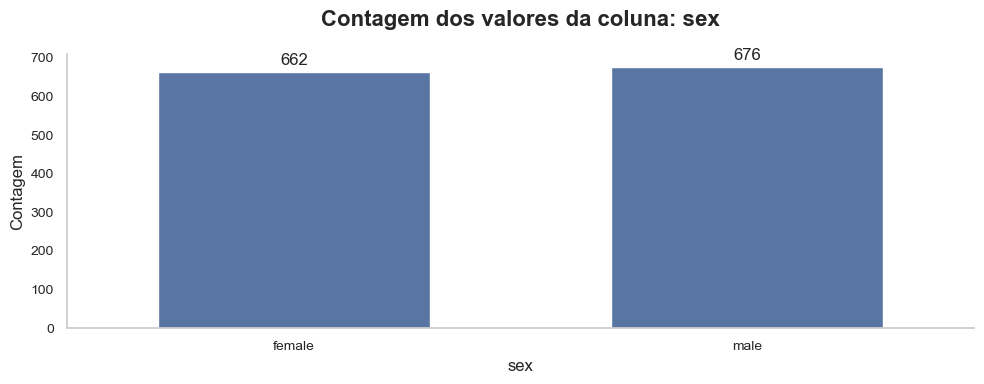

In [72]:
plot_column(dados_insurance, x="sex")

In [73]:
dados_insurance = pd.get_dummies(dados_insurance, columns=['sex'], prefix='sex')

In [74]:
dados_insurance.head()

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1,0
1,18,33.770,1,no,southeast,1725.55230,0,1
2,28,33.000,3,no,southeast,4449.46200,0,1
3,33,22.705,0,no,northwest,21984.47061,0,1
4,32,28.880,0,no,northwest,3866.85520,0,1


### Coluna `smoker`

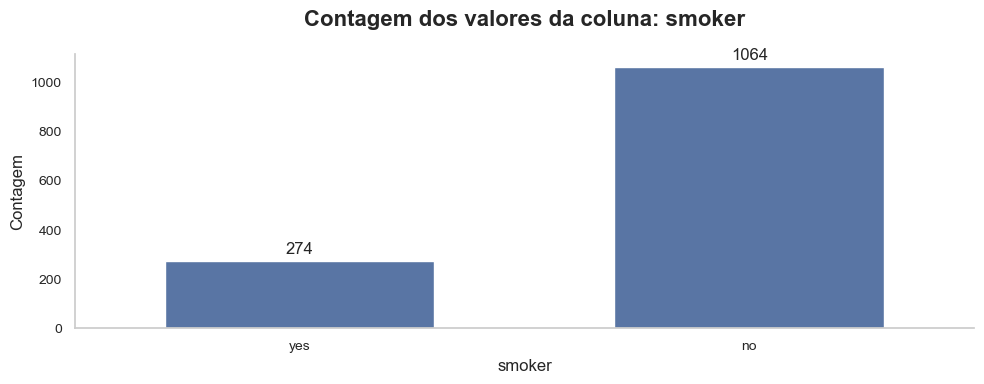

In [75]:
plot_column(dados_insurance, x="smoker")

In [76]:
dados_insurance = pd.get_dummies(dados_insurance, columns=['smoker'], prefix='smoker')

In [77]:
dados_insurance.head()

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,1,0
2,28,33.000,3,southeast,4449.46200,0,1,1,0
3,33,22.705,0,northwest,21984.47061,0,1,1,0
4,32,28.880,0,northwest,3866.85520,0,1,1,0


### Coluna `region`

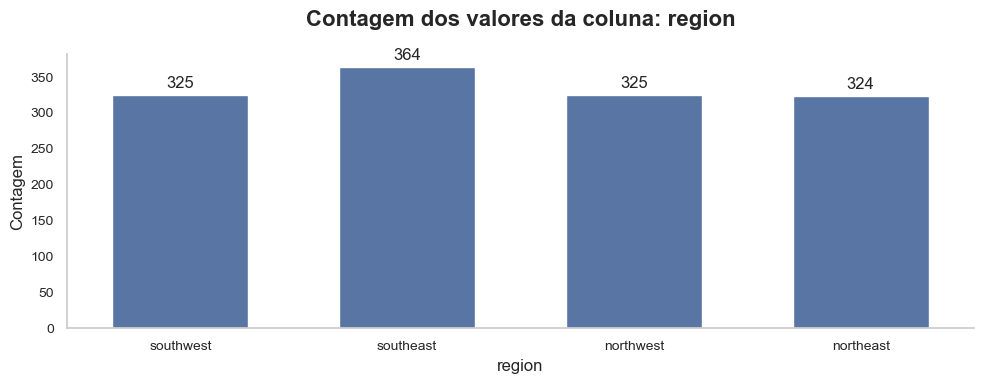

In [43]:
plot_column(dados_insurance, x="region")

In [78]:
dados_insurance = pd.get_dummies(dados_insurance, columns=['region'], prefix='region')

In [79]:
dados_insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Normalização dos dados

In [83]:
dados_insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


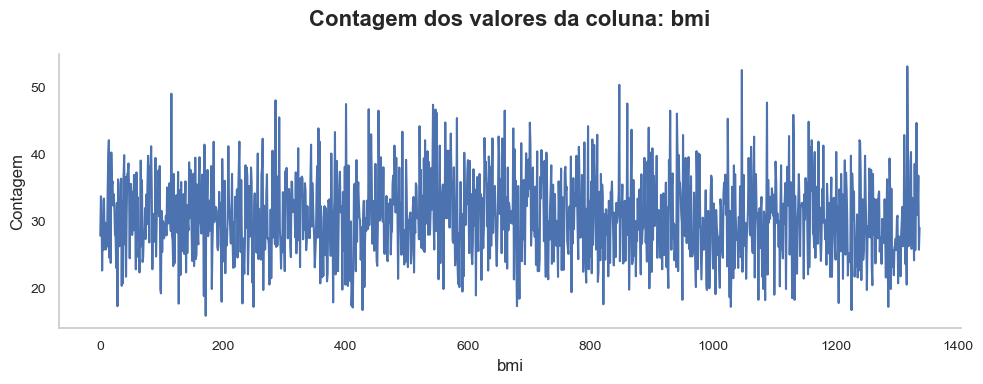

In [90]:
plot_column(dados_insurance, x="bmi", count_=False, line_=True)

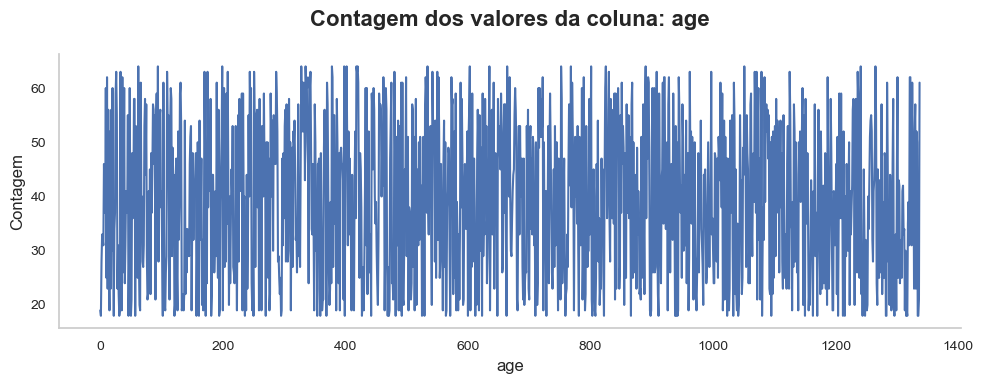

In [91]:
plot_column(dados_insurance, x="age", count_=False, line_=True)

Como será treianda uma rede neural, é interessante normalizar os dados. Mas antes, será verificado se a variável segue uma distribuição normal.

<Axes: xlabel='age', ylabel='Count'>

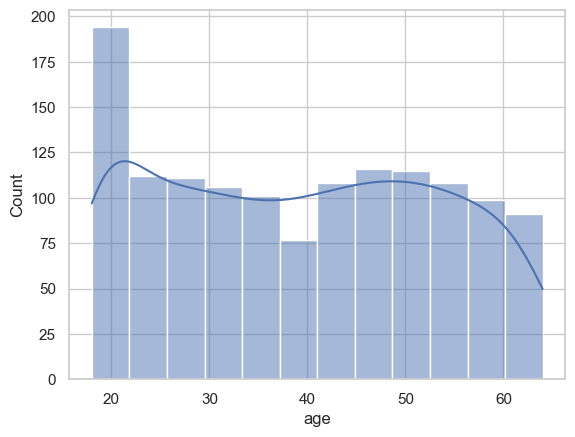

In [93]:
sns.histplot(dados_insurance['age'], kde=True)

<Axes: xlabel='bmi', ylabel='Count'>

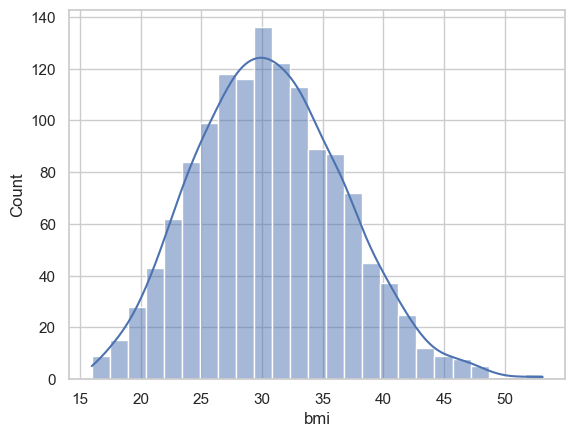

In [99]:
sns.histplot(dados_insurance['bmi'], kde=True)

Para a variável `age`:
- A distribuição não parece normal (gaussiana).
- Há um pico forte à esquerda (em torno de 18-20 anos).
- O restante dos dados está mais disperso e quase uniforme entre 20 e 60 anos.
- A curva KDE não forma uma “curva de sino” simétrica.

Com base nesses pontos, a variável pode apresnetar problemas até mesmo depois de normalizar. Difernete da variável `bmi`, que já segue uma distribuição normal. Para as variáveis serão aplicadas normalizações diferentes:
- StandardScaler para a variável `bmi`;
- MinMaxScaler para a variável `age`, que não segue uma distribuição normal.

In [103]:
scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(dados_insurance['age'].values.reshape(-1, 1))

scaler = StandardScaler()
bmi_scaled = scaler.fit_transform(dados_insurance['bmi'].values.reshape(-1, 1))

In [105]:
age_scaled[:10]

array([[0.02173913],
       [0.        ],
       [0.2173913 ],
       [0.32608696],
       [0.30434783],
       [0.2826087 ],
       [0.60869565],
       [0.41304348],
       [0.41304348],
       [0.91304348]])

In [106]:
bmi_scaled[:10]

array([[-0.45332   ],
       [ 0.5096211 ],
       [ 0.38330685],
       [-1.30553108],
       [-0.29255641],
       [-0.80765608],
       [ 0.45548642],
       [-0.47956712],
       [-0.13671415],
       [-0.79125163]])

In [107]:
dados_insurance["bmi_scaled"] = bmi_scaled
dados_insurance["age_scaled"] = age_scaled

In [108]:
dados_insurance.drop(["age", "bmi"], axis=1, inplace=True)

In [109]:
dados_insurance.head()

,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_scaled,age_scaled
0,0,16884.92400,1,0,0,1,0,0,0,1,-0.453320,0.021739
1,1,1725.55230,0,1,1,0,0,0,1,0,0.509621,0.000000
2,3,4449.46200,0,1,1,0,0,0,1,0,0.383307,0.217391
3,0,21984.47061,0,1,1,0,0,1,0,0,-1.305531,0.326087
4,0,3866.85520,0,1,1,0,0,1,0,0,-0.292556,0.304348


### Nomralização da variável alvo `charges`

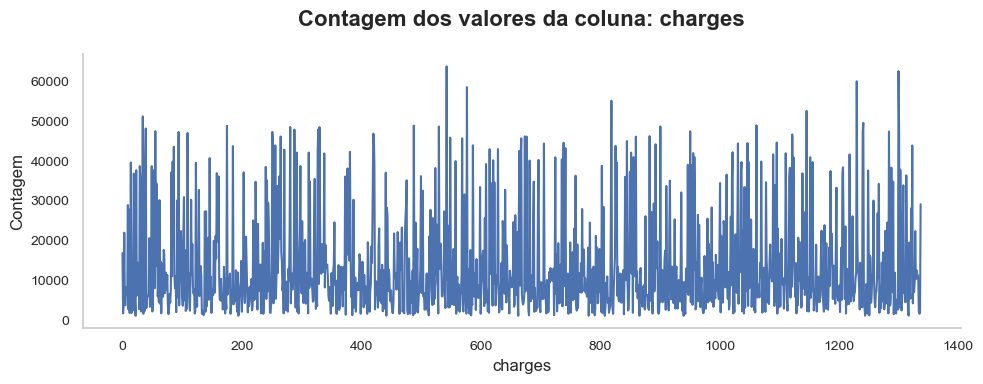

In [110]:
plot_column(dados_insurance, x="charges", count_=False, line_=True)

<Axes: xlabel='charges', ylabel='Count'>

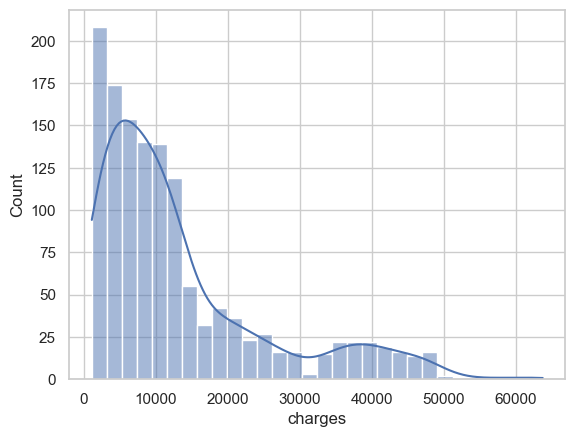

In [111]:
sns.histplot(dados_insurance['charges'], kde=True)

Como a variável `charges` não segue uma distribuição normal, será usado o MinMaxScaler.

In [114]:
scaler = MinMaxScaler()
charges_scaled = scaler.fit_transform(dados_insurance['charges'].values.reshape(-1, 1))

In [115]:
dados_insurance["charges_scaled"] = charges_scaled

In [116]:
dados_insurance.drop(["charges"], axis=1, inplace=True)

In [117]:
dados_insurance.head()

,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_scaled,age_scaled,charges_scaled
0,0,1,0,0,1,0,0,0,1,-0.453320,0.021739,0.251611
1,1,0,1,1,0,0,0,1,0,0.509621,0.000000,0.009636
2,3,0,1,1,0,0,0,1,0,0.383307,0.217391,0.053115
3,0,0,1,1,0,0,1,0,0,-1.305531,0.326087,0.333010
4,0,0,1,1,0,0,1,0,0,-0.292556,0.304348,0.043816


## Salvamento dos dados

In [120]:
dados_insurance.to_csv("../data/processed/processed_insurance.csv", index=False)